In [1]:
# Required libraries to import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

dataFrame = pd.read_csv("Loan_training.csv")

In [62]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [2]:
# Numeric value replacement
dataFrame.replace('Male', 1, inplace=True)
dataFrame.replace('Female', 0, inplace=True)
dataFrame.replace('Graduate', 1, inplace=True)
dataFrame.replace('Not Graduate', 0, inplace=True)
dataFrame.replace('No', 0, inplace=True)
dataFrame.replace('Yes', 1, inplace=True)
dataFrame.replace('Y', 0, inplace=True)
dataFrame.replace('N', 1, inplace=True)
dataFrame.replace('3+', 3, inplace=True)
dataFrame.replace('Urban', 0, inplace=True)
dataFrame.replace('Rural', 1, inplace=True)
dataFrame.replace('Semiurban', 2, inplace=True)
MeanValue = np.mean(dataFrame.LoanAmount)
dataFrame.LoanAmount.fillna(MeanValue,inplace = True)
dataFrame.head() # After replacing missing values

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,0,0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,1
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,0,0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0,0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,0,0


In [64]:
# Exp-1 Finding missing values by counting elements in each column
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(7), int64(4), object(2)
memory usage: 62.4+ KB


In [3]:
#Exp- 2Replace the missing values of the columns named ‘LoanAmount’ by considering mean value
MeanValue = np.mean(dataFrame.LoanAmount)
dataFrame.LoanAmount.fillna(MeanValue, inplace=True)
dataFrame.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,0,0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,1
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,0,0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0,0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,0,0


In [4]:
# EXP-3 missing value pruning by dropping rows
newDataFrame = dataFrame.dropna()
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              499 non-null object
Gender               499 non-null float64
Married              499 non-null float64
Dependents           499 non-null object
Education            499 non-null int64
Self_Employed        499 non-null float64
ApplicantIncome      499 non-null int64
CoapplicantIncome    499 non-null float64
LoanAmount           499 non-null float64
Loan_Amount_Term     499 non-null float64
Credit_History       499 non-null float64
Property_Area        499 non-null int64
Loan_Status          499 non-null int64
dtypes: float64(7), int64(4), object(2)
memory usage: 54.6+ KB


In [67]:
dataFrame.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.050489,0.312704
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.00000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


Deleting outlier rows considering 'ApplicantIncome'


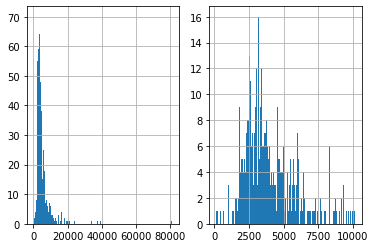

In [5]:
#Exp-4.1 Detect and drop all outliers using IQR (Box plot) methods from “Loan.training.csv”
print("Deleting outlier rows considering 'ApplicantIncome'")
plt.subplot(1,2,1)
dataFrame.ApplicantIncome.hist(bins=200)
dataFrameA = dataFrame[dataFrame['ApplicantIncome'] <= 10172]
# dataFrameA.boxplot(return_type='dict')
# plt.plot()
plt.subplot(1,2,2)
dataFrameA.ApplicantIncome.hist(bins=200)

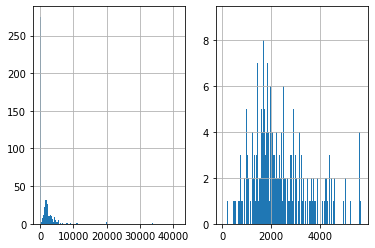

In [6]:
#Exp-4.2 Detect and drop all outliers using IQR (Box plot) methods from “Loan.training.csv”
# print("Deleting outlier rows considering 'ApplicantIncome' and 'CoapplicantIncome'")
plt.subplot(1,2,1)
dataFrame.CoapplicantIncome.hist(bins=200)
dataFrameB = dataFrame[(dataFrame.CoapplicantIncome <= 5743) & (dataFrame.CoapplicantIncome > 0)]
# dataFrameB.boxplot(return_type='dict')
# plt.plot()
plt.subplot(1,2,2)
dataFrameB.CoapplicantIncome.hist(bins=200)

Deleting outlier rows considering 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'


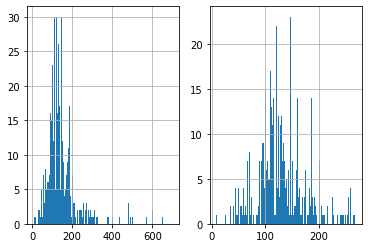

In [7]:
#Exp-4.3 Detect and drop all outliers using IQR (Box plot) methods from “Loan.training.csv”
print("Deleting outlier rows considering 'ApplicantIncome', 'CoapplicantIncome' and 'LoanAmount'")
plt.subplot(1,2,1)
dataFrame.LoanAmount.hist(bins=200)
dataFrameC = dataFrame[dataFrame['LoanAmount'] <= 270]
# dataFrameC.boxplot(return_type='dict')
# plt.plot()
plt.subplot(1,2,2)
dataFrameC.LoanAmount.hist(bins=200)

In [8]:
# sb.heatmap(dataFrame.corr(),annot=True)

In [9]:
# Exp-5.1 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
def outliers_z_score(ys):
    threshold = 3
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

In [10]:
# Exp-5.2 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
def outliers_modified_z_score(ys):
    threshold = 3.5
    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)

Applying z-score to our dataset
Before removing outliers datashape is -> (614, 13)
After removing outliers datashape is -> (606, 13)
Applying modified z-score to our dataset
Before removing outliers datashape is -> (614, 13)
After removing outliers datashape is -> (564, 13)


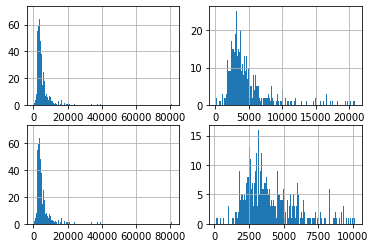

In [11]:
# Exp-5.3 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
print("Applying z-score to our dataset")
k = np.array(outliers_z_score(dataFrame.ApplicantIncome))
# k.reshape(len(k[0]))
print("Before removing outliers datashape is ->",dataFrame.shape)
plt.subplot(2,2,1)
dataFrame.ApplicantIncome.hist(bins=200)
CleandataFrame = dataFrame.drop(k[0])
print("After removing outliers datashape is ->",CleandataFrame.shape)
plt.subplot(2,2,2)
CleandataFrame.ApplicantIncome.hist(bins=200)
print("Applying modified z-score to our dataset")
k = np.array(outliers_modified_z_score(dataFrame.ApplicantIncome))
# k.reshape(len(k[0]))
print("Before removing outliers datashape is ->",dataFrame.shape)
plt.subplot(2,2,3)
dataFrame.ApplicantIncome.hist(bins=200)
CleandataFrame = dataFrame.drop(k[0])
print("After removing outliers datashape is ->",CleandataFrame.shape)
plt.subplot(2,2,4)
CleandataFrame.ApplicantIncome.hist(bins=200)
plt.show()

Applying z-score to our dataset
Before removing outliers datashape is -> (614, 13)
After removing outliers datashape is -> (606, 13)
Applying modified z-score to our dataset
Before removing outliers datashape is -> (614, 13)
After removing outliers datashape is -> (564, 13)


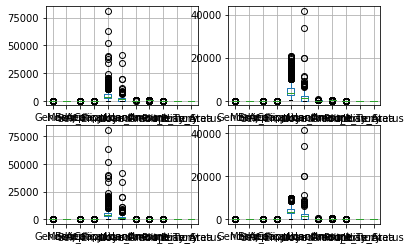

In [12]:
# Exp-5.4 Detect and drop all outliers using Z-score methods from “Loan.training.csv”
print("Applying z-score to our dataset")
k = np.array(outliers_z_score(dataFrame.ApplicantIncome))
# k.reshape(len(k[0]))
print("Before removing outliers datashape is ->",dataFrame.shape)
plt.subplot(2,2,1)
dataFrame.boxplot(return_type='dict')
CleandataFrame = dataFrame.drop(k[0])
print("After removing outliers datashape is ->",CleandataFrame.shape)
plt.subplot(2,2,2)
CleandataFrame.boxplot(return_type='dict')
print("Applying modified z-score to our dataset")
k = np.array(outliers_modified_z_score(dataFrame.ApplicantIncome))
# k.reshape(len(k[0]))
print("Before removing outliers datashape is ->",dataFrame.shape)
plt.subplot(2,2,3)
dataFrame.boxplot(return_type='dict')
CleandataFrame = dataFrame.drop(k[0])
print("After removing outliers datashape is ->",CleandataFrame.shape)
plt.subplot(2,2,4)
CleandataFrame.boxplot(return_type='dict')
plt.show()

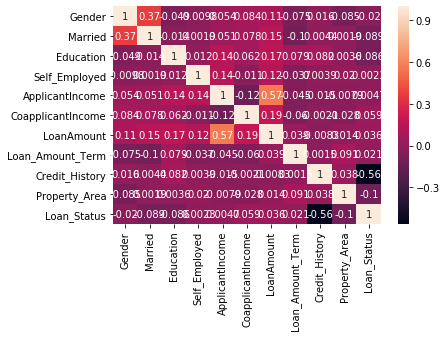

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(6), int64(4), object(2)
memory usage: 57.6+ KB


In [13]:
# Exp-6.1 Find the Pearson’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
Corelations = dataFrame.corr(method='pearson')
sb.heatmap(Corelations, annot=True)
plt.show()
upper = Corelations.where(np.triu(np.ones(Corelations.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.55
to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]
droppedDf = dataFrame.drop(dataFrame[to_drop], axis=1)
droppedDf.info()

Visualizing corelations after dropping highly corelated datas


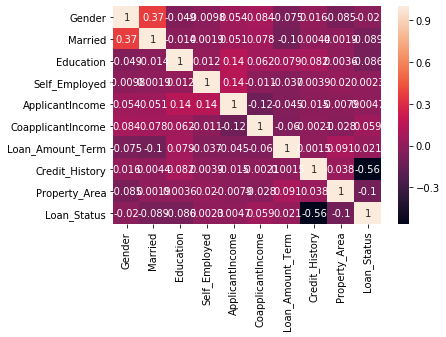

In [14]:
# Exp-6.2 Find the Pearson’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
print("Visualizing corelations after dropping highly corelated datas")
Corelations = droppedDf.corr(method='pearson')
sb.heatmap(Corelations, annot=True)
plt.show()

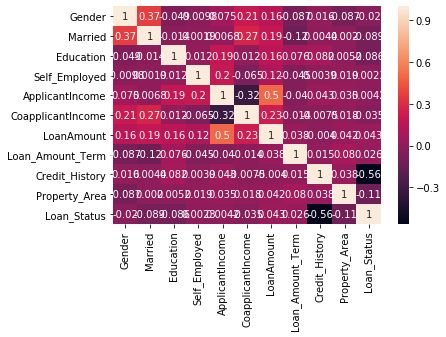

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null float64
Married              611 non-null float64
Dependents           599 non-null object
Education            614 non-null int64
Self_Employed        582 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(7), int64(4), object(2)
memory usage: 62.4+ KB


In [15]:
# Exp- 7.1 Find the Spearman’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
SpearManCorrelations = dataFrame.corr(method='spearman')
sb.heatmap(SpearManCorrelations,annot=True)
plt.show()
upper = Corelations.where(np.triu(np.ones(Corelations.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.55
to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]
droppedDfS = dataFrame.drop(dataFrame[to_drop], axis=1)
droppedDfS.info()

Visualizing corelations after dropping highly corelated datas


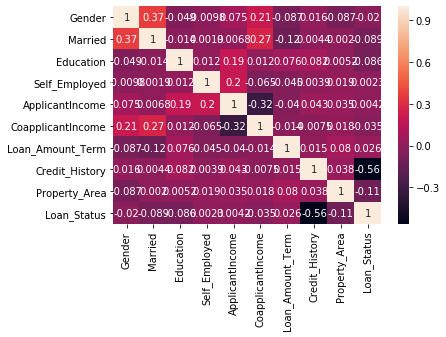

In [16]:
# Exp- 7.2 Find the Spearman’s correlation coefficient among features of
#“Loan_training.csv” and delete the highly correlated features from
#“Loan_training.csv”.
print("Visualizing corelations after dropping highly corelated datas")
Corelations = droppedDf.corr(method='spearman')
sb.heatmap(Corelations, annot=True)
plt.show()

Train set: (366, 6) (366,)
Test set: (92, 6) (92,)
Train set Accuracy:  0.8333333333333334
Test set Accuracy:  0.7608695652173914


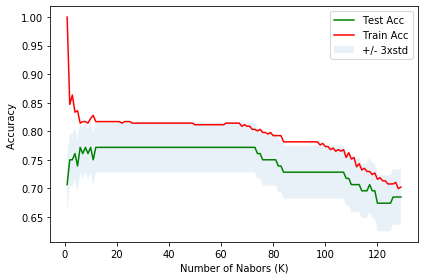

The best accuracy was with 0.7717391304347826 with k= 6
[[62  1]
 [20  9]]
Accuracy Score : 0.7717391304347826
Report : 
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        63
           1       0.90      0.31      0.46        29

    accuracy                           0.77        92
   macro avg       0.83      0.65      0.66        92
weighted avg       0.80      0.77      0.73        92



In [94]:
# Exp- 8.1 Build k-NN(k-nearest Neighbours) supervised machine learning
# model using Loan_training dataset. Find the accuracy and F1
# Score on Loan_testing dataset.
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

CleandataFrame = CleandataFrame.dropna()
X = CleandataFrame[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                    'Property_Area','Credit_History']]
Y = CleandataFrame.Loan_Status
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
Ks = 130
mean_acc = np.zeros((Ks-1))
Mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    Yhat = neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    Mean_acc[n-1] = metrics.accuracy_score(y_train, Yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.plot(range(1,Ks),Mean_acc,'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Test Acc ', 'Train Acc', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
k = mean_acc.argmax()+1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
results=confusion_matrix(y_test, yhat)
print(results)
print ('Accuracy Score :', accuracy_score(y_test, yhat) )
print ('Report : ')
print (classification_report(y_test, yhat) )


In [95]:
# required installation for visualization of Decision Tree
!conda install -c conda-forge pydotplus -y             # Execute this cell for once
!conda install -c conda-forge python-graphviz -y       # Execute this cell for once
# Pleace ensure that you have proper internet connection 
# this installation requires data files from internet


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/rango/anaconda3

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    graphviz-2.40.1            |       h21bd128_2         6.5 MB
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.5 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/linux-64::graphviz-2.40.1-h21bd128_2
  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3

Shape of X_trainset : (320, 6)
Shape of y_trainset  : (320,)
Shape of X_testset : (138, 6)
Shape of y_testset  : (138,)
Decision Trees's Accuracy:  0.7753623188405797
[[87  6]
 [25 20]]
Accuracy Score : 0.7753623188405797
Report : 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        93
           1       0.77      0.44      0.56        45

    accuracy                           0.78       138
   macro avg       0.77      0.69      0.71       138
weighted avg       0.77      0.78      0.76       138



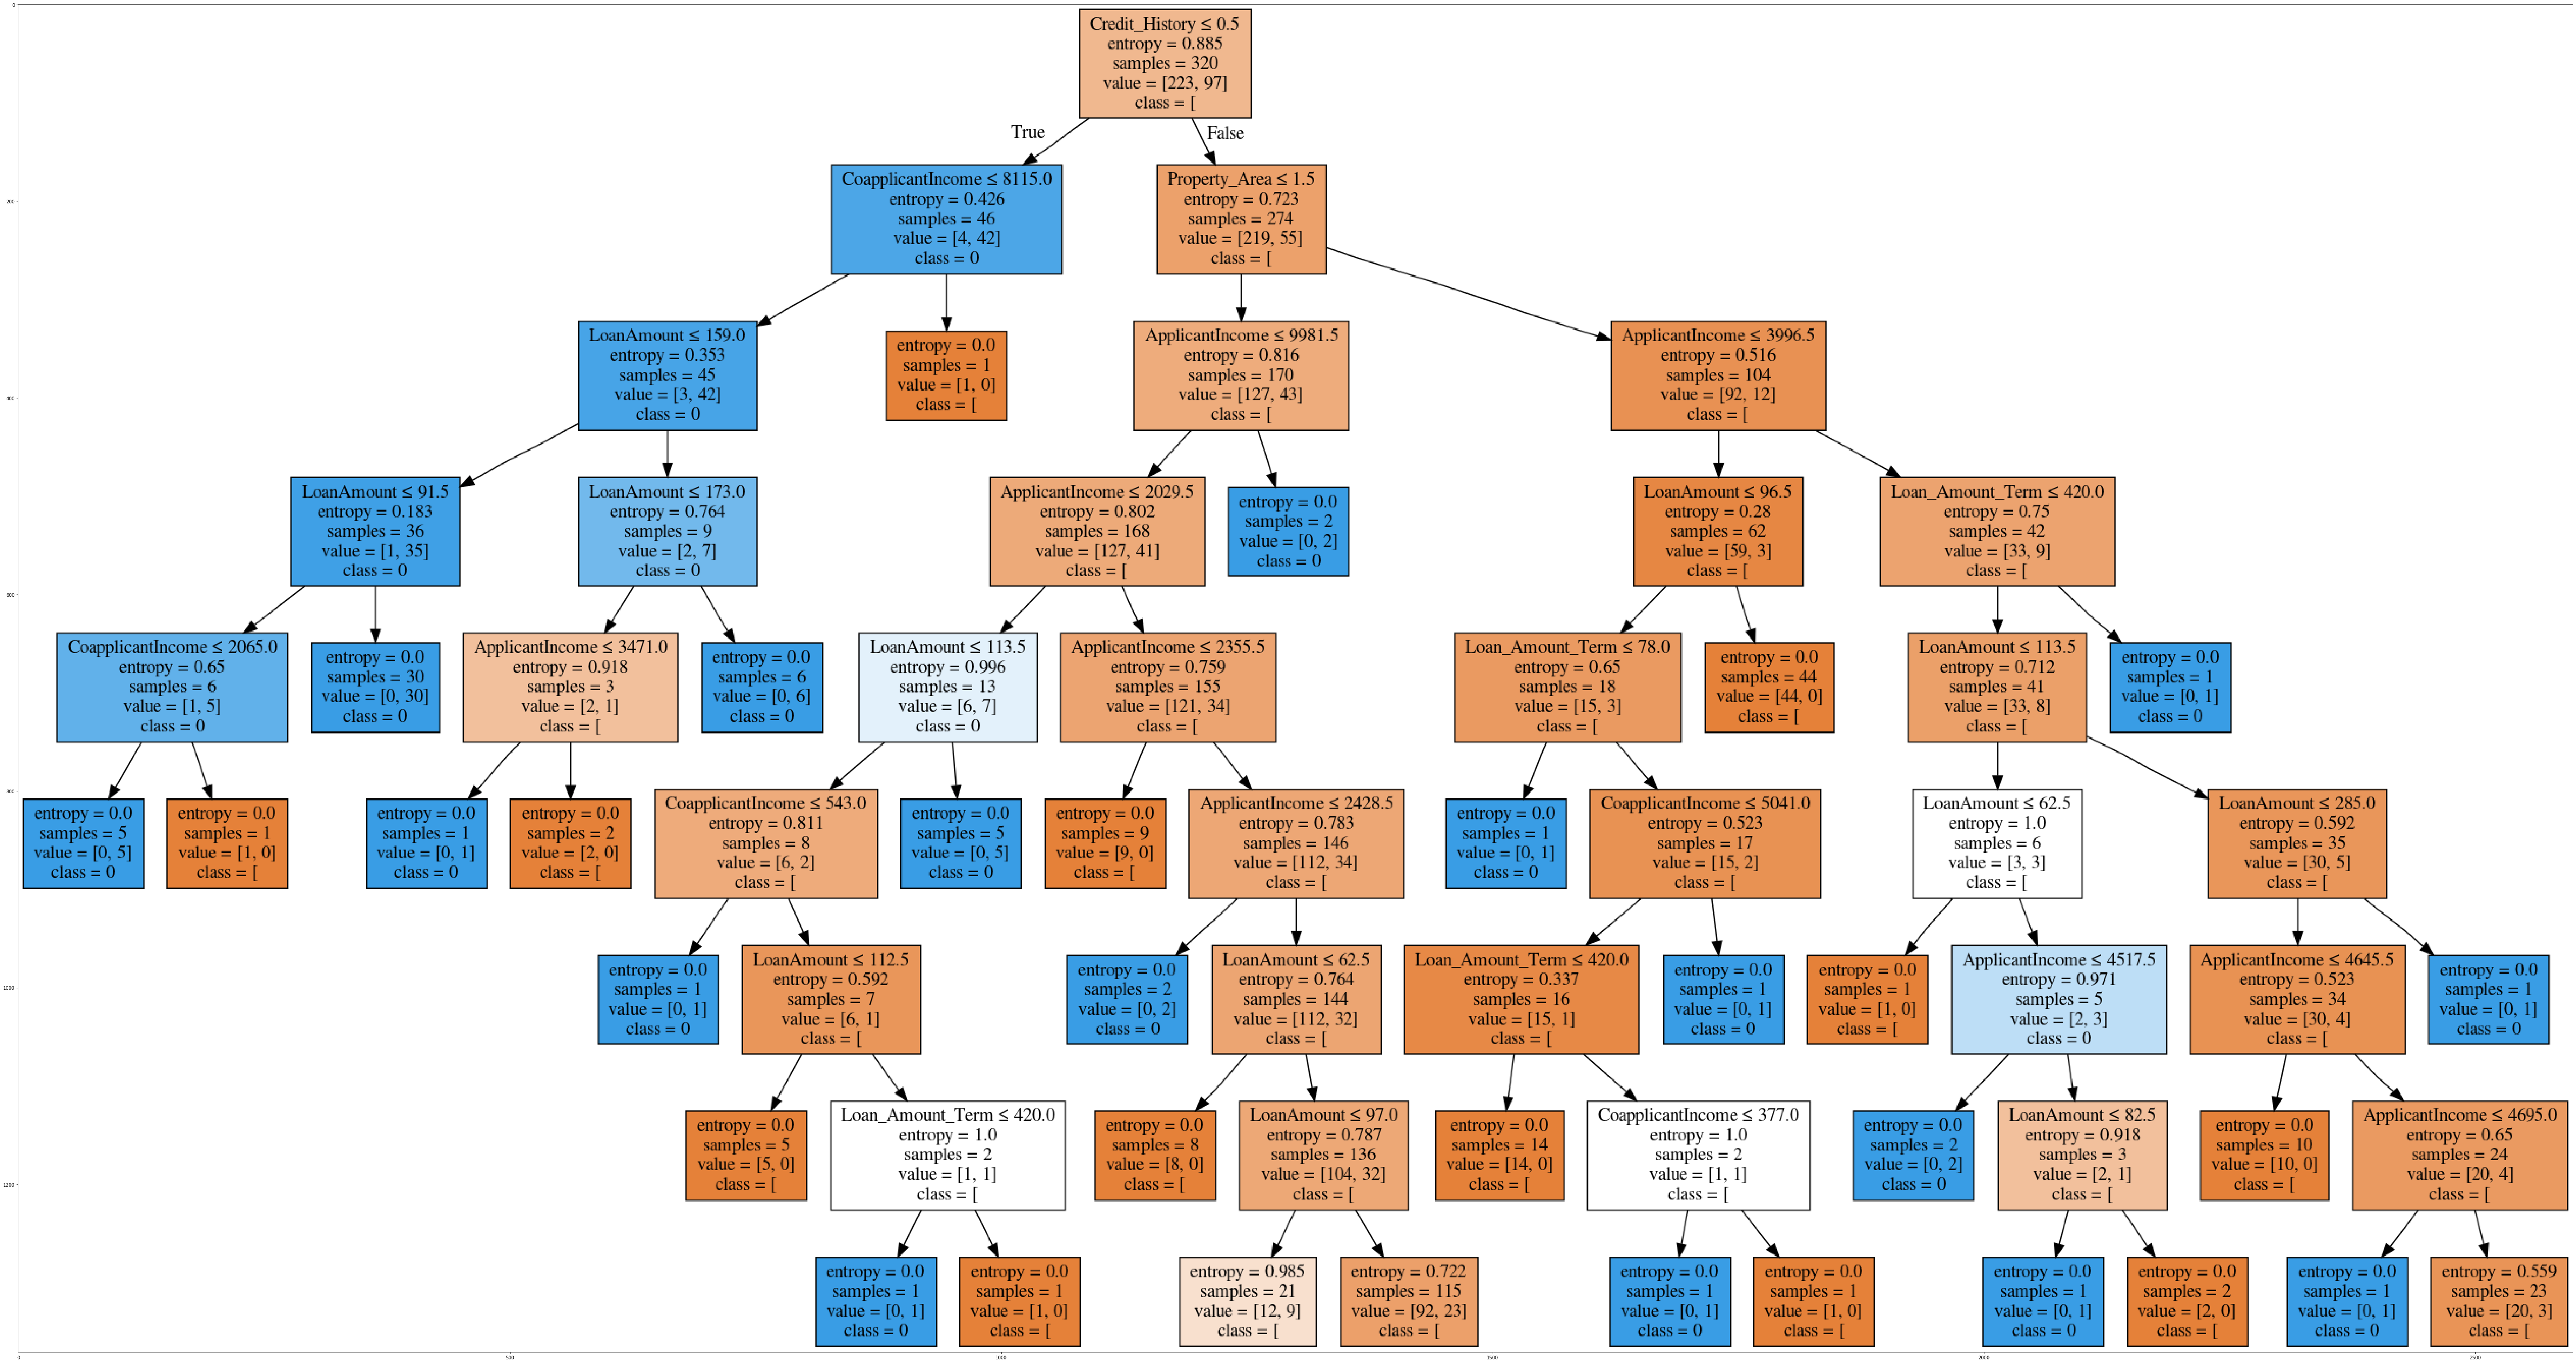

In [18]:
# Exp- 9.1 Build DT (Decision Tree) supervised machine learning model using
# Loan_training dataset. Find the accuracy and F1 Score on
# Loan_testing dataset.
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

CleandataFrame = CleandataFrame.dropna()
X = CleandataFrame[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                    'Property_Area','Credit_History']]
Y = CleandataFrame.Loan_Status
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)
print("Shape of X_trainset :", X_trainset.shape)
print("Shape of y_trainset  :", y_trainset.shape)
print("Shape of X_testset :", X_testset.shape)
print("Shape of y_testset  :", y_testset.shape)

# Modeling .  [ Please Open the EXP_9_Loan_Decision_tree.png image file and observe what is happening here .]
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)# here max_depth represents the Max tree height
                                                                     # change the value of max_depth and watch the 
                                                                     # accuracy of the model and think why did this happened
Tree.fit(X_trainset,y_trainset) 

# Prediction
predTree = Tree.predict(X_testset)

# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))
results=confusion_matrix(y_testset, predTree)
print(results)
print ('Accuracy Score :', accuracy_score(y_testset, predTree) )
print ('Report : ')
print (classification_report(y_testset, predTree) )

# Visualization
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "EXP_9_Loan_Decision_tree.png"
featureNames = X.columns
targetNames = Y.unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_trainset)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

Train set: (366, 6) (366,)
Test set: (92, 6) (92,)
Accuracy score : 0.70
              precision    recall  f1-score   support

           0       0.69      1.00      0.82        63
           1       1.00      0.03      0.07        29

    accuracy                           0.70        92
   macro avg       0.85      0.52      0.44        92
weighted avg       0.79      0.70      0.58        92

Confusion matrix, without normalization
[[63  0]
 [28  1]]
F1 score 0.5812911725955203
Jaccard index  0.6956521739130435


/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/rango/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


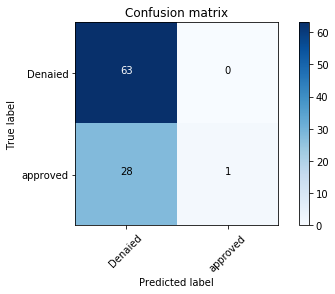

In [104]:
# Exp-10.1 Build support vector machine(SVM) supervised machine learning
# model using Loan_training dataset. Find the accuracy and F1
# Score on Loan_testing dataset.

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

CleandataFrame = CleandataFrame.dropna()
X = CleandataFrame[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                    'Property_Area','Credit_History']]
Y = CleandataFrame.Loan_Status
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Modeling SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

# Predection
yhat = clf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)#, labels=[2,4])
np.set_printoptions(precision=2)
print("Accuracy score : %0.2f" %accuracy_score(y_test, yhat))
print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Denaied','approved'],normalize= False,  title='Confusion matrix')

from sklearn.metrics import f1_score
print("F1 score",f1_score(y_test, yhat, average='weighted') )
from sklearn.metrics import jaccard_similarity_score
print("Jaccard index ",jaccard_similarity_score(y_test, yhat))

In [ ]:
# Exp-11 Build Naive Bayes (NB) supervised machine learning model using
# Loan_training dataset. Find the accuracy and F1 Score on
# Loan_testing dataset.

Working on it . :)

In [24]:
# Exp-12.1 Build K-mean unsupervised machine learning model using
# Loan_training dataset. Find the accuracy and F1 Score on
# Loan_testing dataset.
CleandataFrame = CleandataFrame.dropna()
X = CleandataFrame[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
                    'Property_Area','Credit_History']]
Y = CleandataFrame.Loan_Status
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2).fit(X)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
results=confusion_matrix(Y, Kmean.labels_)
print(results)
print ('Accuracy Score :', accuracy_score(Y, Kmean.labels_) )
print ('Report : ')
print (classification_report(Y, Kmean.labels_) )

[[315   1]
 [140   2]]
Accuracy Score : 0.6921397379912664
Report : 
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       316
           1       0.67      0.01      0.03       142

    accuracy                           0.69       458
   macro avg       0.68      0.51      0.42       458
weighted avg       0.68      0.69      0.57       458



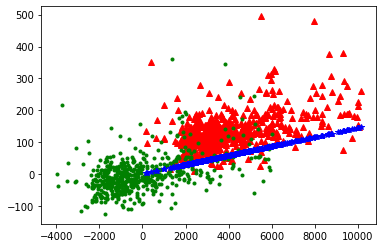

In [80]:
# Exp- 13.* Manual approach to calculate univariate linear regression Doesn't required for experiment .
# its dummy
X = CleandataFrame.ApplicantIncome
Y = CleandataFrame.LoanAmount
miuX = np.mean(X)
newX = X-miuX
miuY = np.mean(Y)
newY = Y-miuY
k = newX.T @ newX
m = ((newX.T@newY)/k)
plt.plot(X,Y,'r^')
# plt.pause(0.0000000001)
plt.plot(newX,newY,'g.')
# plt.pause(0.0000000001)
plt.plot(X,m*X,'b*')
plt.show()

MAE     : 42.47715
MSE     : 3412.07184
RMSE    : 58.41294
RAE     : 1.04195
RSE     : 1.01415
R2_Score: -0.01415


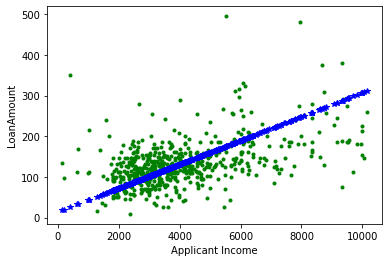

In [84]:
# Exp-13 Build simple Linear Regression machine learning model using
# 'LoanAmount', ‘ApplicantIncome' columns of Loan_training dataset.
# Calculate the followings values on on Loan_testing dataset
# i. Mean Absolute Error
# ii. Mean Squared Error
# iii. Root Mean Squared Error
# Univariate linear regression

CleandataFrame
X = CleandataFrame.ApplicantIncome
Y = CleandataFrame.LoanAmount
miuX = np.mean(X)
miuY = np.mean(Y)
k = (X.T @ X)
ThetaOne = (X.T@Y)/k
ThetaZero = miuY - miuX*ThetaOne
Y_hat = ThetaOne*X + ThetaZero
plt.plot(X,Y,'g.')
plt.plot(X,Y_hat,'b*')
plt.xlabel("Applicant Income")
plt.ylabel("LoanAmount")
MAE = np.mean(np.fabs(Y-Y_hat))                          
MSE = np.mean((Y-Y_hat)**2)                              
RMSE = np.sqrt(MSE)                                      
RAE = np.sum(np.fabs(Y-Y_hat)) / np.sum(np.fabs(Y-miuY)) 
RSE = np.sum((Y-Y_hat)**2) / np.sum((Y-miuY)**2)         
R2_score = 1-RSE                                         
print("MAE     : %0.5f" %MAE)                            # Mean Absolute Error
print("MSE     : %0.5f" %MSE)                            # Mean Squared Error
print("RMSE    : %0.5f" %RMSE)                           # Root Mean Squared Error
print("RAE     : %0.5f" %RAE)                            # Relative Absolute Error
print("RSE     : %0.5f" %RSE)                            # Relative Squared Error
print("R2_Score: %0.5f" %R2_score)                       # R2_score (it represents hot close the data values are to the
                                                         #           fitted regression line. The higher the R2 the
                                                         #           better the model)
plt.show()

Predicted shape:  (564, 1)
MAE     : 33.59935
MSE     : 2312.27073
RMSE    : 48.08608
RAE     : 0.82418
RSE     : 0.68726
R2_Score: 0.31274


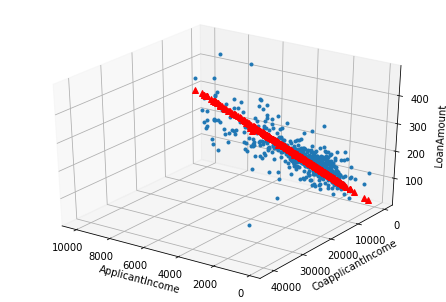

Note: This figure should be 3D but in notebook it is showing only 2D projection of the 3D plot
You can visualize it in python interperter directly source file containing *.py extention :)
Just copy the code and save it in .py file extension and run it. don't forgot to copy required libraries
and loading datafile also


In [86]:
# Exp-14 Build multiple Linear Regression machine learning model using
# 'LoanAmount', ‘ApplicantIncome' columns of Loan_training dataset.
# Calculate the following values on Loan_testing dataset
# i. Mean Absolute Error
# ii. Mean Squared Error
# iii. Root Mean Squared Error
# Multivariate Linear regression
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
X1 = np.asarray(CleandataFrame.ApplicantIncome)
X2 = np.asarray(CleandataFrame.CoapplicantIncome)
Idx = X1.argsort()
X1 = X1[Idx]
X2 = X2[Idx]

x1 = X1.reshape((len(X1), 1))
x2 = X2.reshape((len(X2), 1))
Y = np.asarray(CleandataFrame.LoanAmount)
Y = Y[Idx]
y = Y.reshape((len(Y),1))
X = np.append(x1,x2,axis=1)
miuX = np.mean(X, axis=0)
miuY = np.mean(y, axis=0)
ThetaOne = np.linalg.inv(X.T @ X)@X.T@y
ThetaZero = miuY - miuX @ ThetaOne
# print(ThetaZero.shape)
# print(ThetaOne.shape)
def predict(x):
    y_hat = ThetaZero + x @ ThetaOne
    print("Predicted shape: ",y_hat.shape)
    return y_hat[:,0]

ax.plot(X1, X2, Y,'.')
Y_hat = predict(X)
ax.plot(X1, X2, Y_hat,'r^')
ax.set_xlabel('ApplicantIncome')
ax.set_ylabel('CoapplicantIncome')
ax.set_zlabel('LoanAmount')
ax.view_init(elev=30,azim=125)
MAE = np.mean(np.fabs(Y-Y_hat))                          
MSE = np.mean((Y-Y_hat)**2)                              
RMSE = np.sqrt(MSE)                                      
RAE = np.sum(np.fabs(Y-Y_hat)) / np.sum(np.fabs(Y-miuY)) 
RSE = np.sum((Y-Y_hat)**2) / np.sum((Y-miuY)**2)         
R2_score = 1-RSE
print("MAE     : %0.5f" %MAE)                            # Mean Absolute Error
print("MSE     : %0.5f" %MSE)                            # Mean Squared Error
print("RMSE    : %0.5f" %RMSE)                           # Root Mean Squared Error
print("RAE     : %0.5f" %RAE)                            # Relative Absolute Error
print("RSE     : %0.5f" %RSE)                            # Relative Squared Error
print("R2_Score: %0.5f" %R2_score)                       # R2_score (it represents hot close the data values are to the
                                                         #           fitted regression line. The higher the R2 the
                                                         #           better the model)
plt.show()
print("Note: This figure should be 3D but in notebook it is showing only 2D projection of the 3D plot")
print("You can visualize it in python interperter directly source file containing *.py extention :)")
print("Just copy the code and save it in .py file extension and run it. don't forgot to copy required libraries");
print("and loading datafile also");

In [83]:
np.unique(np.asarray(CleandataFrame.Property_Area))


array([0, 1, 2])